In [1]:
import pandas as pd

In [2]:
# See https://pbpython.com/pandas-excel-tabs.html for guidance on how to read all sheets into a single dataframe.
years = ['2017', '2018', '2019', '2020'] # Specify the years for the worksheets we want.
df = pd.concat(pd.read_excel("usage_history_200001102972.xlsx", sheet_name=years), ignore_index=True)
df.head()

,Billing Period,Days of Use,Usage measured on,Units of usage,Amount,Meter number
0,Dec-17,32,12/04/2017,41,71.99,BA416708
1,Nov-17,29,11/02/2017,21,40.90,BA416708
2,Oct-17,28,10/04/2017,16,33.24,BA416708
3,Sep-17,34,09/06/2017,15,31.69,BA416708
4,Aug-17,29,08/03/2017,17,34.79,BA416708


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Billing Period     48 non-null     object 
 1   Days of Use        48 non-null     int64  
 2   Usage measured on  48 non-null     object 
 3   Units of usage     48 non-null     int64  
 4   Amount             48 non-null     float64
 5   Meter number       48 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.4+ KB


In [4]:
cols = list(df.columns)
cols

['Billing Period',
 'Days of Use',
 'Usage measured on',
 'Units of usage ',
 'Amount',
 'Meter number']

In [5]:
df[cols[2]] = pd.to_datetime(df[cols[2]]) # Convert "Usage measured on" field to datetime.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Billing Period     48 non-null     object        
 1   Days of Use        48 non-null     int64         
 2   Usage measured on  48 non-null     datetime64[ns]
 3   Units of usage     48 non-null     int64         
 4   Amount             48 non-null     float64       
 5   Meter number       48 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.4+ KB


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set_style("darkgrid")

<AxesSubplot:title={'center':'Natural gas usage'}, xlabel='Date', ylabel='Usage (Ccf)'>

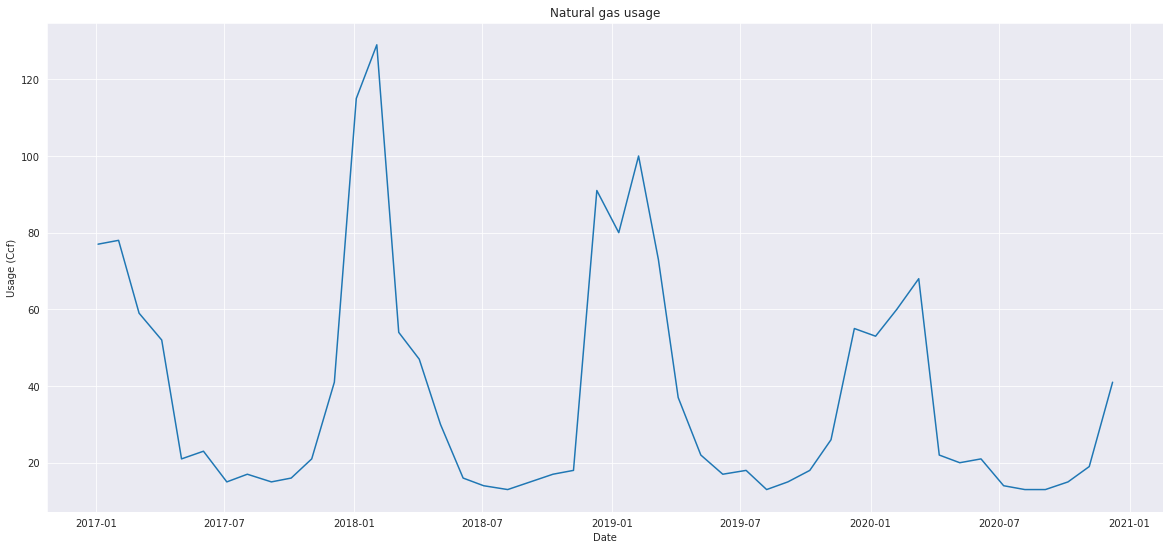

In [9]:
plt.figure(figsize=(20,9))
plt.title("Natural gas usage")
plt.ylabel("Usage (Ccf)")
plt.xlabel("Date")
sns.lineplot(data=df, x=cols[2], y=cols[3])

Natural gas is measured in units of 100 cubic feet, also known as a Ccf. The C represents the Roman numeral for 100, the cf for cubic feet.